# R Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import polyfit, polyval

%matplotlib inline

## objectives
1. year vice graph NDVI values
2. yala, maha season vice graph in one yr
3. remove the cloud affect & regraph

In [2]:
ndvi_df = pd.read_csv('./csv/ndvi.csv')
ndvi_df.head(5)

,Unnamed: 0,channel,date,min,max,mean,stDev
0,177,0,2015-11-28,0.024384,0.242231,0.088855,0.051101
1,176,0,2015-12-28,-0.012204,0.110473,0.036047,0.022595
2,175,0,2016-03-27,0.065089,0.313997,0.182319,0.043077
3,174,0,2016-04-26,0.072630,0.266636,0.181640,0.039938
4,173,0,2016-06-05,0.025319,0.680269,0.191573,0.141791


In [3]:
type(ndvi_df['mean'])

pandas.core.series.Series

### yr vice mean NDVI value graph with cloud

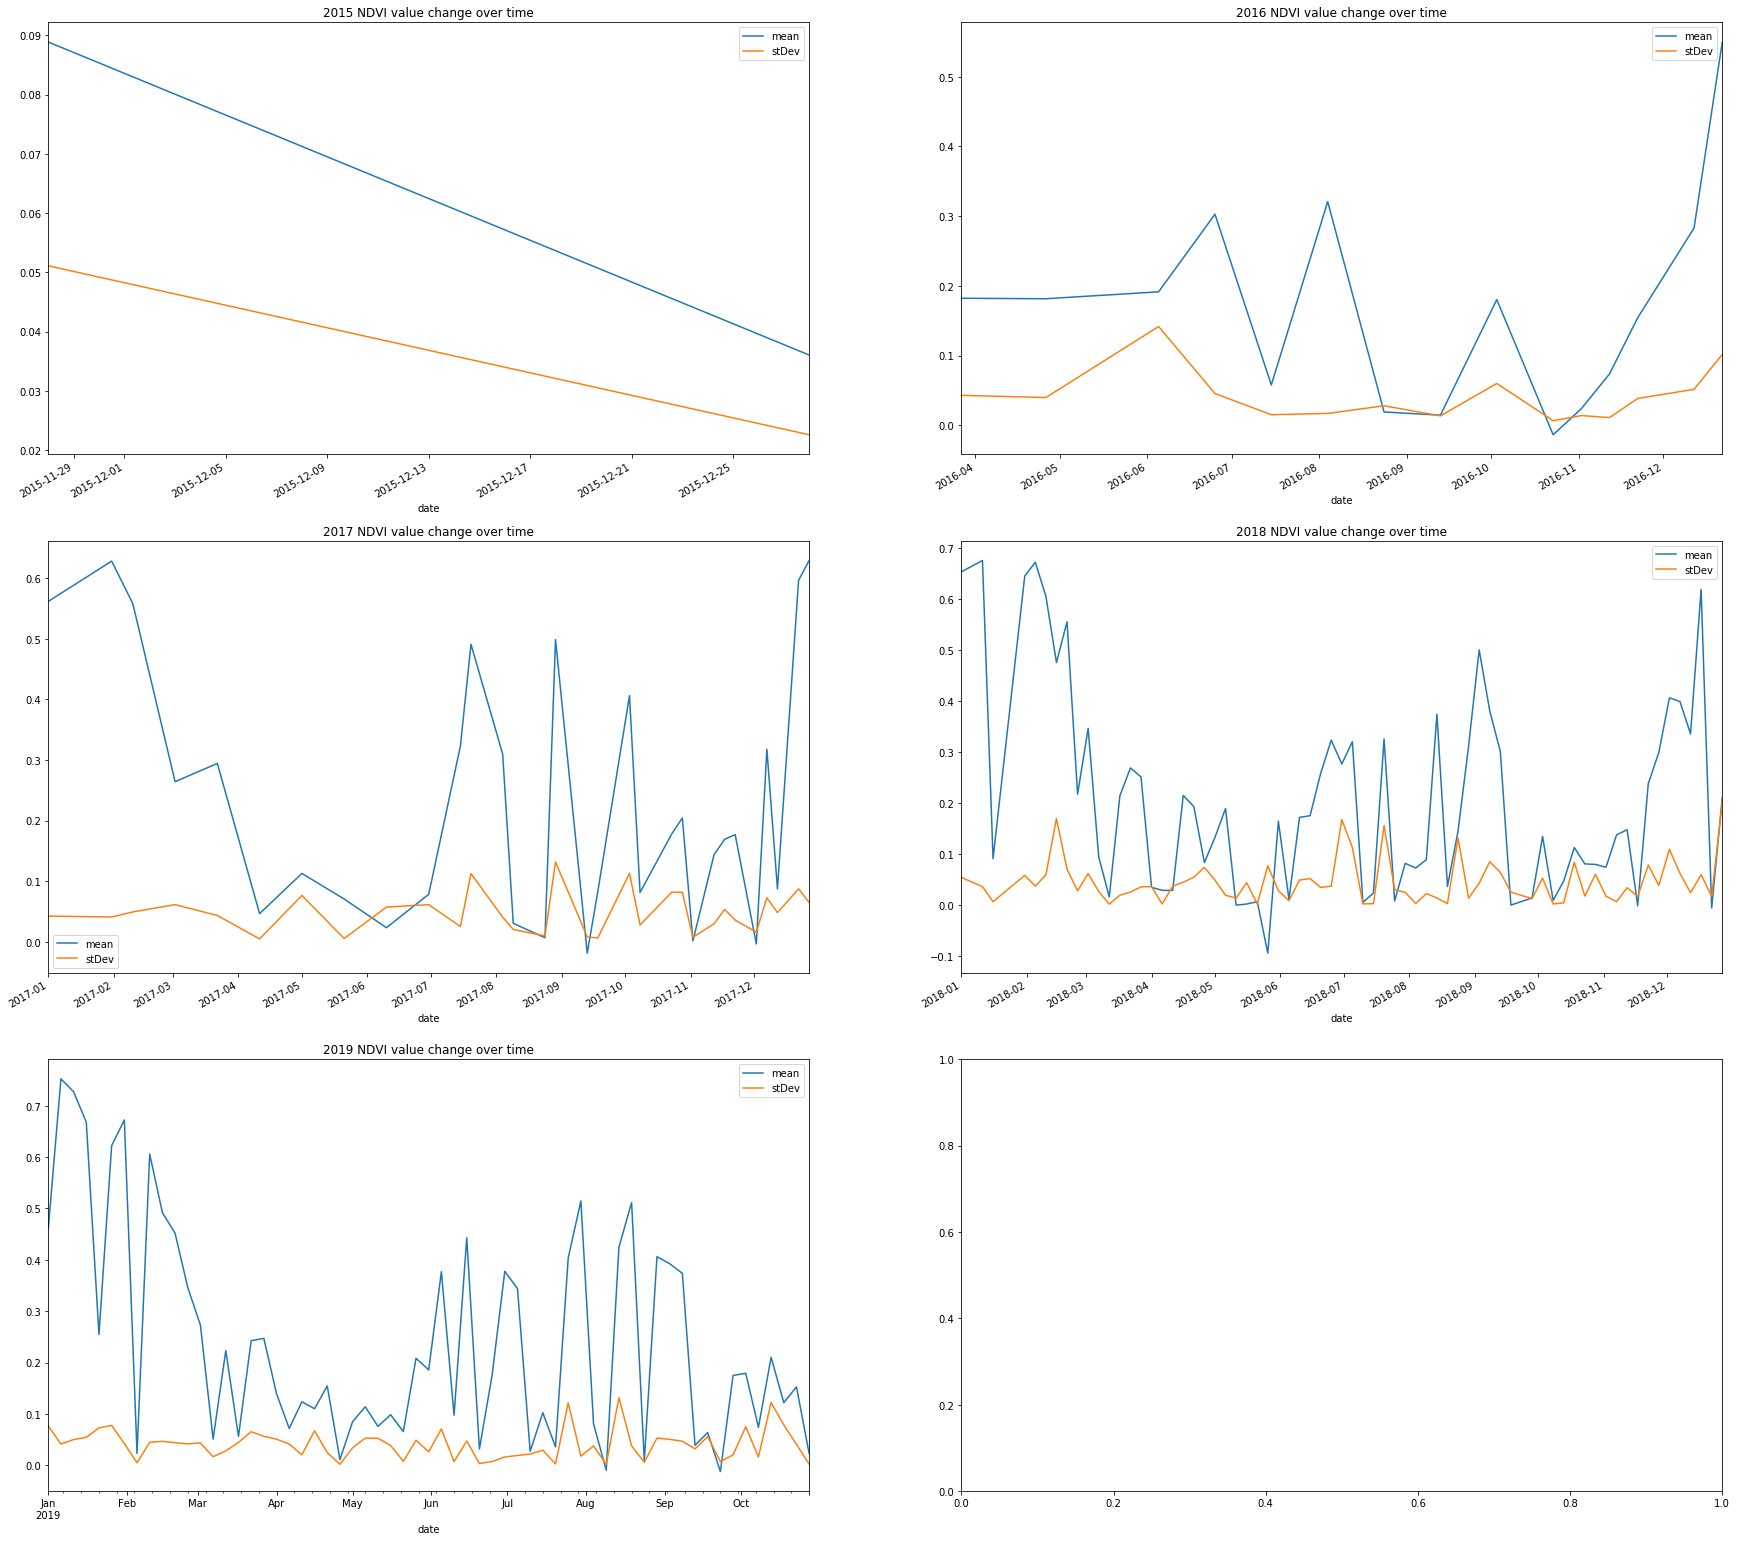

In [4]:
years = [2015, 2016, 2017, 2018,2019]
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(30,30))
row = col =0
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])

for i, year in enumerate(years):
    new_df = ndvi_df[ndvi_df['date'].dt.year == year]
   
    if i % 2==0:
        col = 0
        row = row +1
    else:
        col = 1
    
    #save data & and plot
    new_df.to_csv('./csv/'+str(year)+'ndvi.csv', sep=',')
#     axes[row-1,col].plot(new_df['date'],new_df['mean'])
    new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[row-1,col])
    axes[row-1,col].set_title(str(year) + ' NDVI value change over time')
    

    

### yr vice with yala maha season NDVI values change over the time with cloud

In [9]:
def ndvi_yala_maha(yala_Maha_dates, yala_maha_tag):
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    for i in range(0,2):

        # check the date between start_date and end_date and plot them
        new_df = df[(df['date'] >= yala_Maha_dates[i][0]) &  (df['date'] <= yala_Maha_dates[i][1])]

    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
        ax = new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[i])
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20) 

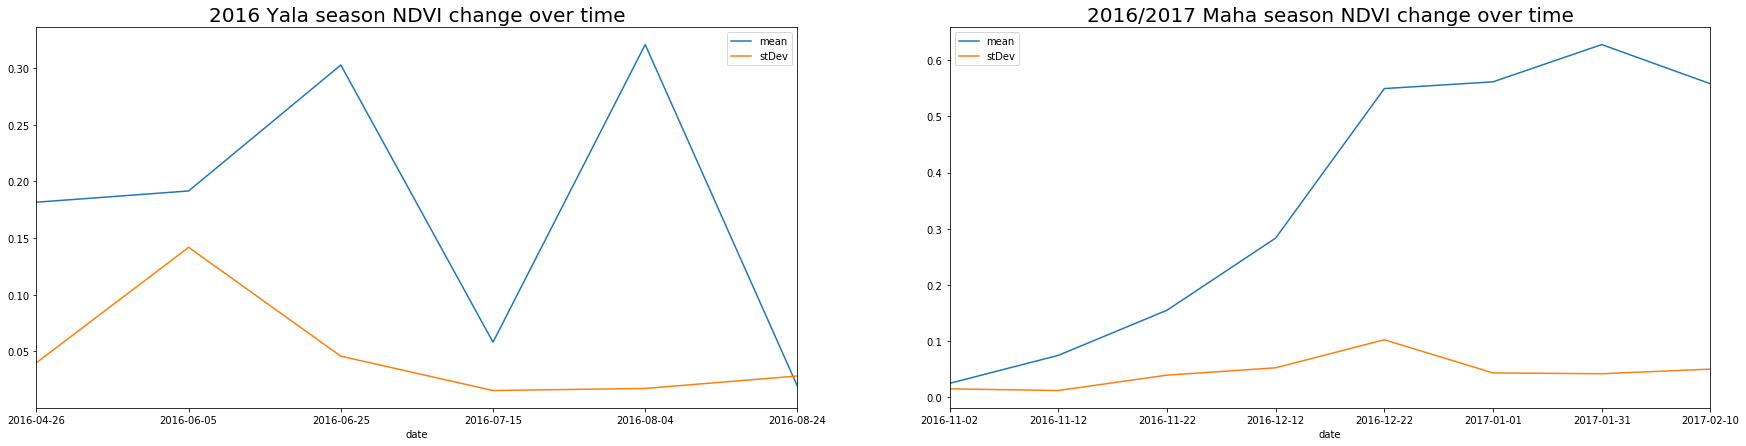

In [11]:
# ndvi_yala_maha(csv_file, start_date, end_date,tag=('yala/maha'))
ndvi_yala_maha([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016/2017', 'Maha']])


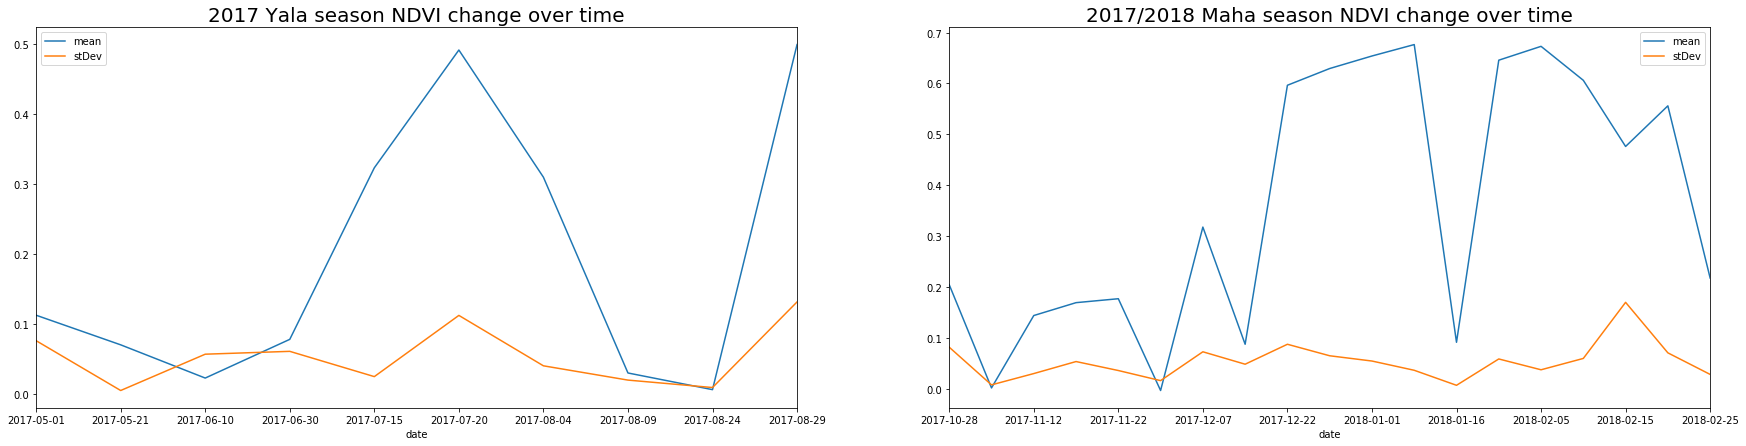

In [10]:
ndvi_yala_maha([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017/2018', 'Maha']])

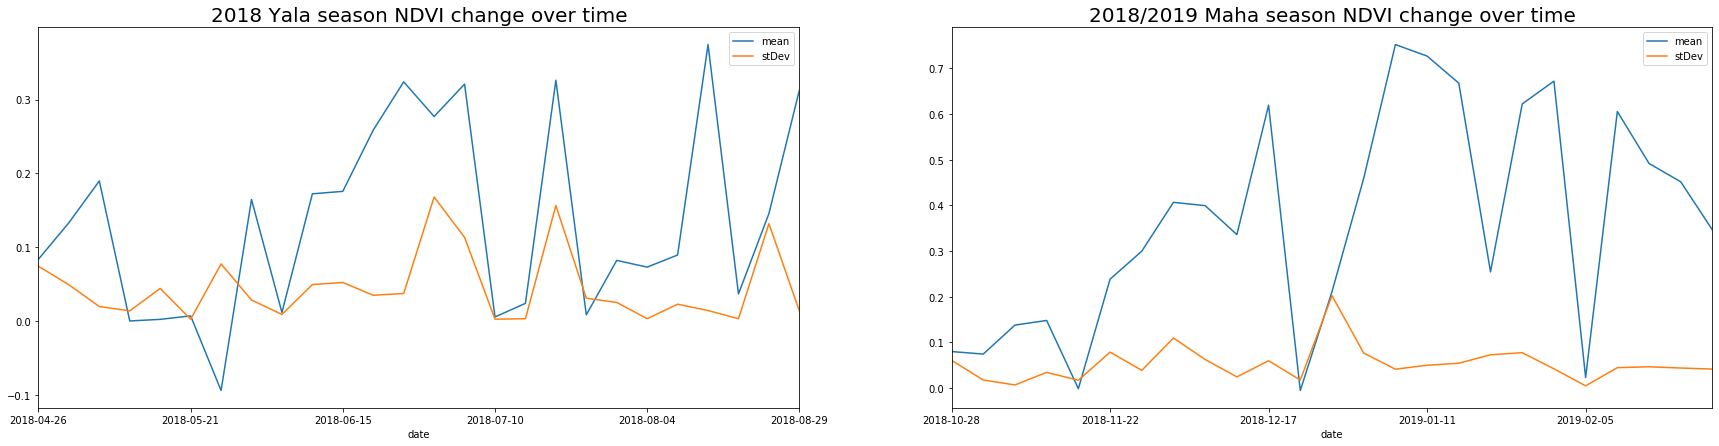

In [12]:
ndvi_yala_maha([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-25']],[['2018', 'Yala'],['2018/2019', 'Maha']])

d:\campuz\4 yr\research-final\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


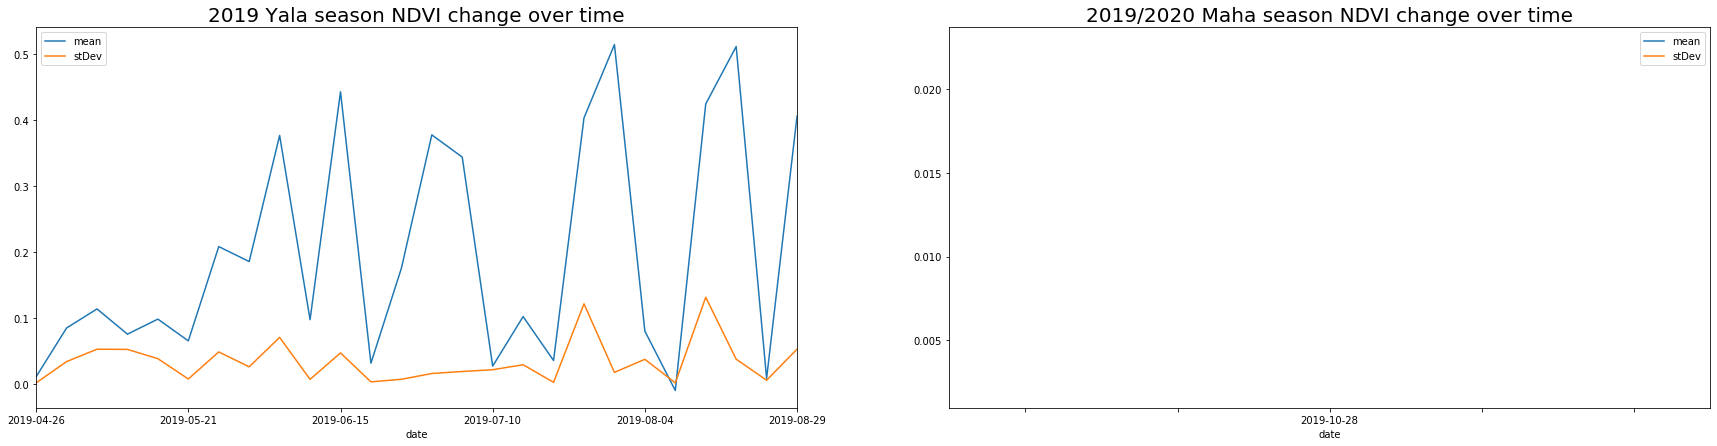

In [13]:
ndvi_yala_maha([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019/2020', 'Maha']])

### yr vice with yala maha season NDVI values change over the time without cloud and best fit line

In [6]:
def get_cloud_free_dates(root = './b11b8b2-dataset'):
    
    could_free_arr=[]
    
    for _root, _dirs, _files in os.walk(root):
        if _files:
            could_free_arr += _files
            
    # get only date array
    
    for i, elem in enumerate(could_free_arr):
        could_free_arr[i] = elem.split('_')[-2].split('T')[0]
    
    return (could_free_arr)

In [38]:
def ndvi_yala_maha_with_out_cloud(yala_Maha_dates, yala_maha_tag):
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    cloud_free_dates = get_cloud_free_dates()
    rows = []
    col = ['date', 'mean', 'stDev']
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    # create a df  cloud
    for date in cloud_free_dates:
#         print(date) sub_df.iloc[0]['A']
        cloud_free_df = df[(df.date == date)]
        row = [cloud_free_df.iloc[0]['date'], cloud_free_df.iloc[0]['mean'], cloud_free_df.iloc[0]['stDev']]
        rows.append(row)
        
    cloud_free_df = pd.DataFrame(rows, columns=col) # this is a cloud free dataset
    
    
    for i in range(0,2):

        # check the date between start_date and end_date and plot them
        new_df = cloud_free_df[(cloud_free_df['date'] >= yala_Maha_dates[i][0]) &  (cloud_free_df['date'] <= yala_Maha_dates[i][1])]
        
        if len(new_df.index) <= 1:
            continue # to remove the error of 0 data points
            
    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
    
        ax = new_df.plot(x='date',y=['mean', 'stDev'], ax=axes[i])
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20) 
        
        numaric_dates = [date for date in pd.to_datetime(new_df['date']).map(dt.datetime.toordinal)]
        mean_val = [mean for mean in new_df['mean']]
        p1 = polyfit(numaric_dates, mean_val, 1)
        p2 = polyfit(numaric_dates, mean_val, 2)
        print('liner gradient is: ' + str(p1[0]))
        print('poly gradient is: ' + str(p2[0])+' '+str(p2[1]))
        ax.plot([date for date in new_df['date']], polyval(p1,numaric_dates),'g--')
        ax.plot([date for date in new_df['date']], polyval(p2,numaric_dates),'r--')
        

d:\campuz\4 yr\research-final\env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


liner gradient is: 0.0020197529184050214
poly gradient is: 1.371822781792245e-09 1.2798259013862553e-07
liner gradient is: 0.005184180987248778
poly gradient is: -0.00012652925904622496 186.34025792257816


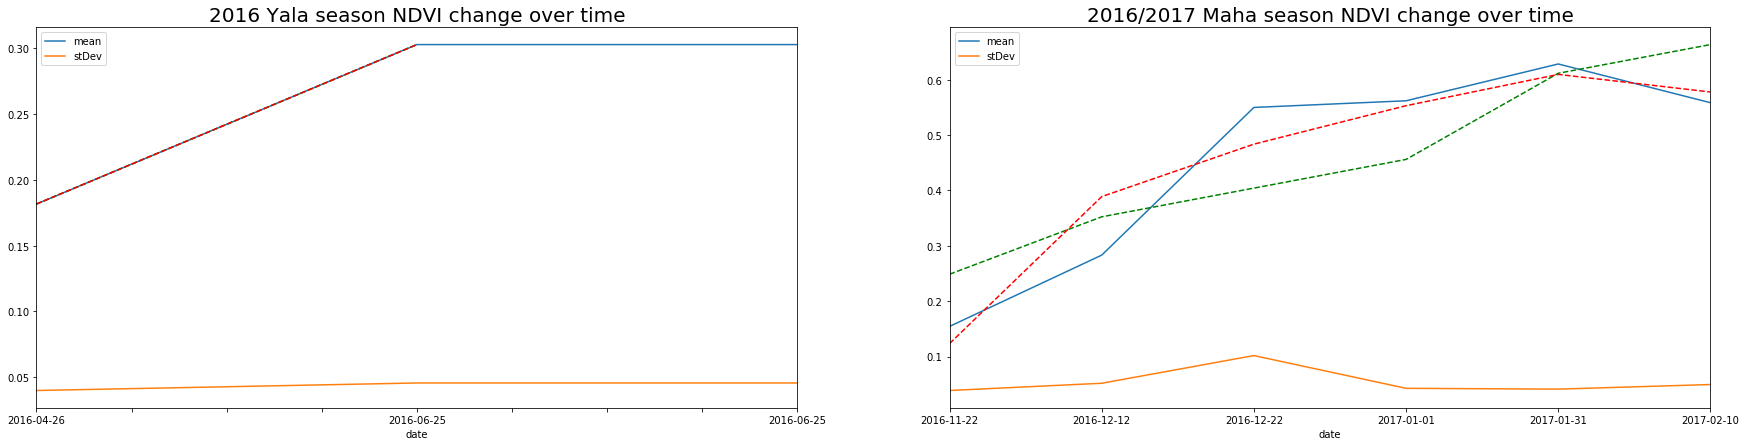

In [39]:
ndvi_yala_maha_with_out_cloud([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016/2017', 'Maha']])

liner gradient is: 0.004380542938768891
poly gradient is: -7.684015683258979e-05 113.2191904145867


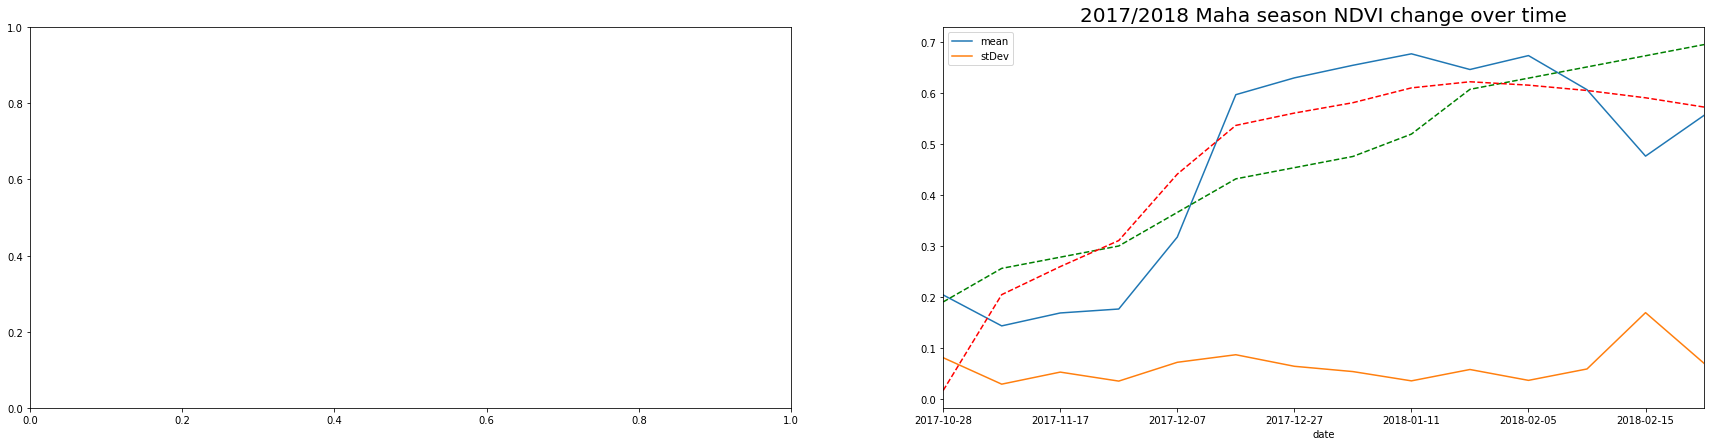

In [40]:
ndvi_yala_maha_with_out_cloud([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017/2018', 'Maha']])

liner gradient is: 0.0016317190805207394
poly gradient is: -2.2689833325461207e-05 33.440861259352815
liner gradient is: 0.003891931054140413
poly gradient is: -0.00011711404440400721 172.64288362657035


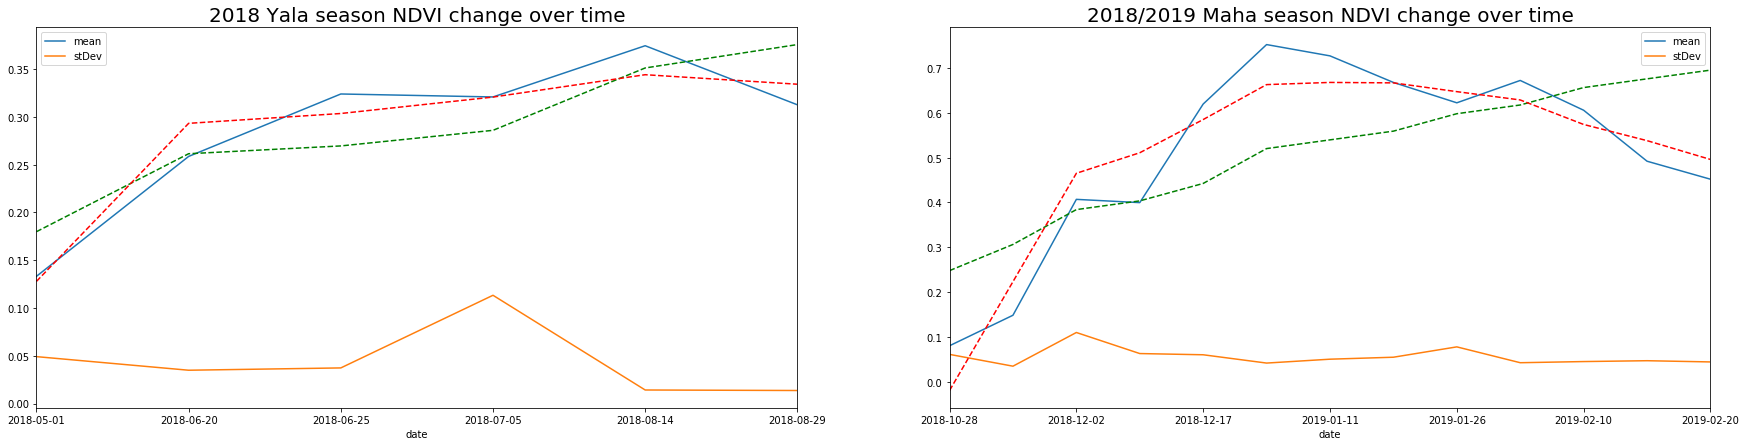

In [41]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-20']],[['2018', 'Yala'],['2018/2019', 'Maha']])

liner gradient is: 0.004290885661482019
poly gradient is: -0.0001650817070528737 243.40470132269309


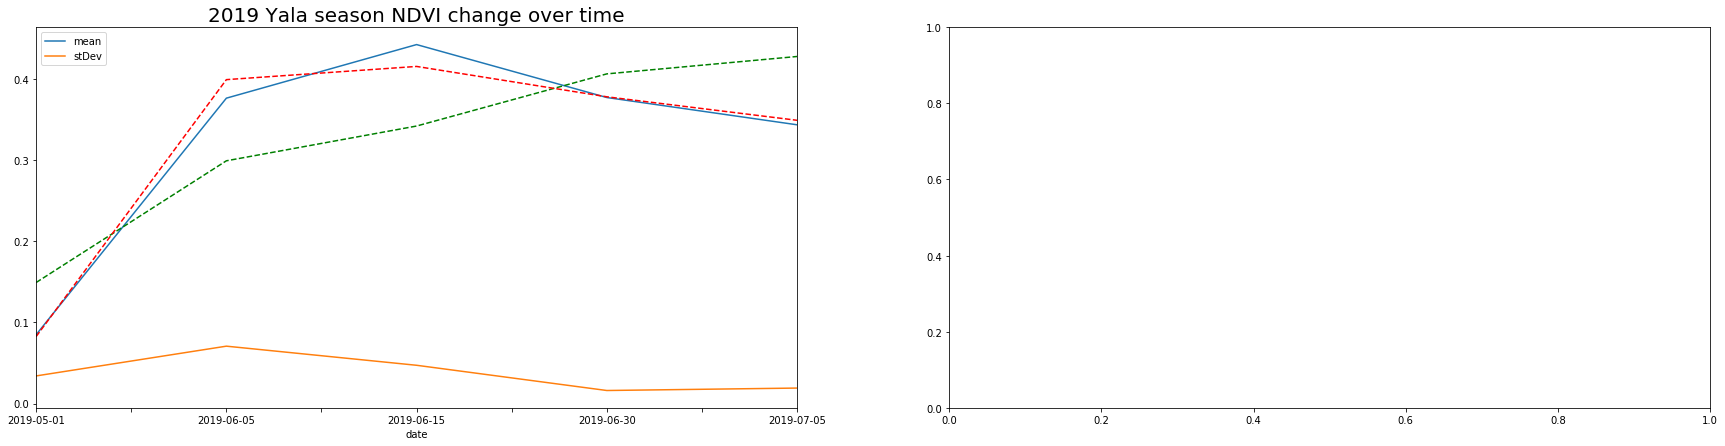

In [42]:
ndvi_yala_maha_with_out_cloud([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019/2020', 'Maha']])

### corelation analysis with gradient of the NDVI over time vs past yield data of paddy

althought there are 8 paddy seasonal, the gredient can be obtain 5 paddy seasonal because of the cloud affects

In [124]:
paddy_df = pd.read_csv('./csv/linear_paddy_data.csv')
paddy_df.head(5)

# here X represent the NDVI gredient value of paddy seasonal
# Y represent the harvest yield metric ton per acre

,X,Y
0,0.005184,1.36
1,0.004381,1.36
2,0.001632,1.32
3,0.003892,1.34


In [102]:
# find the outliers using Using Z score
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [103]:
X_data = [x for x in paddy_df['X'][0:4]]
detect_outlier(X_data)

[]

In [125]:
paddy_df.corr()

,X,Y
X,1.000000,0.951097
Y,0.951097,1.000000


In [126]:
# paddy yield model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(paddy_df[['X']],paddy_df[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
linear_model.coef_

array([[11.95704437]])

In [139]:
linear_model.intercept_

array([1.29989691])

In [140]:
paddy_df1 = pd.read_csv('./csv/ploy2_paddy_data.csv')
paddy_df1.head(5)

,X,Y
0,-0.000127,1.36
1,-7.684016,1.36
2,-2.268983,1.32
3,-0.000117,1.34


In [109]:
X_data = [x for x in paddy_df1['X']]
detect_outlier(X_data)

[]

In [141]:
paddy_df1.corr()

,X,Y
X,1.000000,-0.281089
Y,-0.281089,1.000000


In [142]:

poly2_model = LinearRegression()
poly2_model .fit(paddy_df1[['X']],paddy_df1[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
poly2_model.coef_

array([[-0.00148474]])

In [144]:
poly2_model.intercept_

array([1.3413055])

In [114]:
paddy_df2 = pd.read_csv('./csv/ploy1_paddy_data.csv')
paddy_df2.head(5)

,X,Y
0,186.340258,1.36
1,113.219190,1.36
2,33.440861,1.32
3,172.642884,1.34


In [115]:
X_data = [x for x in paddy_df2['X']]
detect_outlier(X_data)

[]

In [116]:
paddy_df2.corr()

,X,Y
X,1.000000,0.698517
Y,0.698517,1.000000


In [149]:
ploy1_model = LinearRegression()
ploy1_model.fit(paddy_df2[['X']],paddy_df2[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
ploy1_model.coef_

array([[0.00019209]])

In [151]:
ploy1_model.intercept_

array([1.32071825])

### accuracy assesment

liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.010277996583965715
poly gradient is: 1.9458466159866654e-05 -28.672640384834242


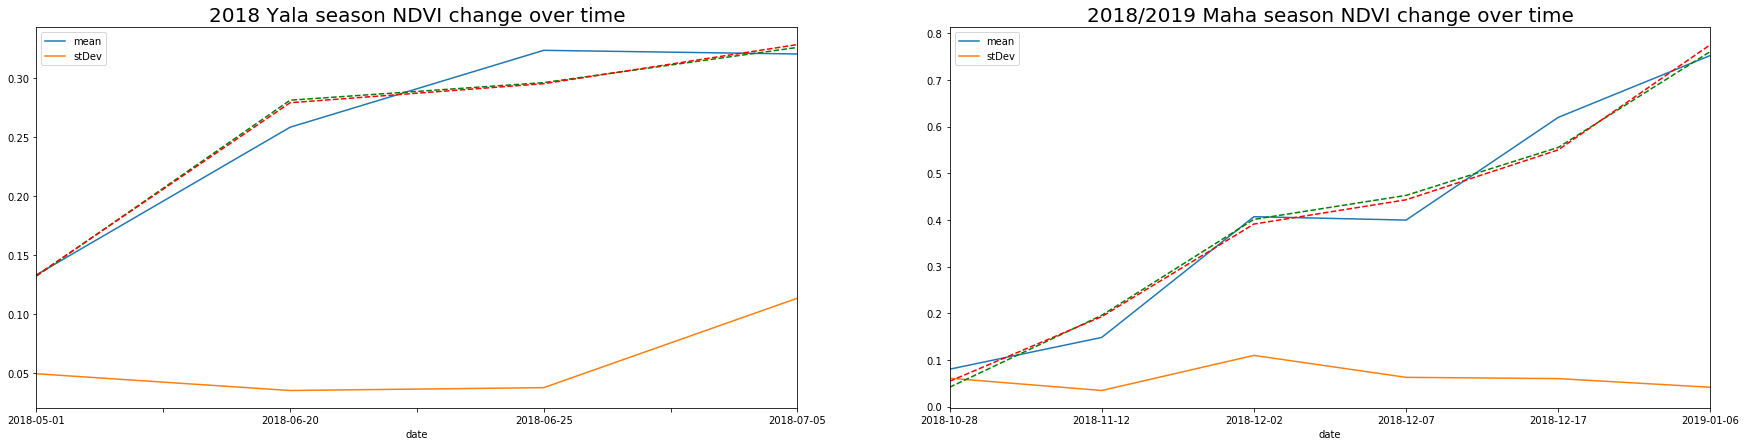

In [123]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-06'], ['2018-10-26', '2019-01-10']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [133]:
print("2018 Yala season 3rd phase(1) "+ str(linear_model.predict([[0.002989866695678894]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.33564688]] pre acre


In [147]:
print("2018-2019 Maha season 3rd phase(1) "+ str(linear_model.predict([[0.010277996583965715]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.42279137]] pre acre


### ployline mode with order 2

In [146]:
print("2018 Yala season 3rd phase(1) "+ str(poly2_model.predict([[5.572777568719754]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.33303135]] pre acre


In [148]:
print("2018-2019 Maha season 3rd phase(1) "+ str(poly2_model.predict([[1.9458466159866654]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.33841641]] pre acre


### ployline mode with order 1

In [153]:
print("2018 Yala season 3rd phase(1) "+ str(ploy1_model.predict([[-8.209556984430844]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.3191413]] pre acre


In [154]:
print("2018-2019 Maha season 3rd phase(1) "+ str(ploy1_model.predict([[-28.672640384834242]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.31521063]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.008693122287653895
poly gradient is: -4.444932511925169e-05 65.53026977538318


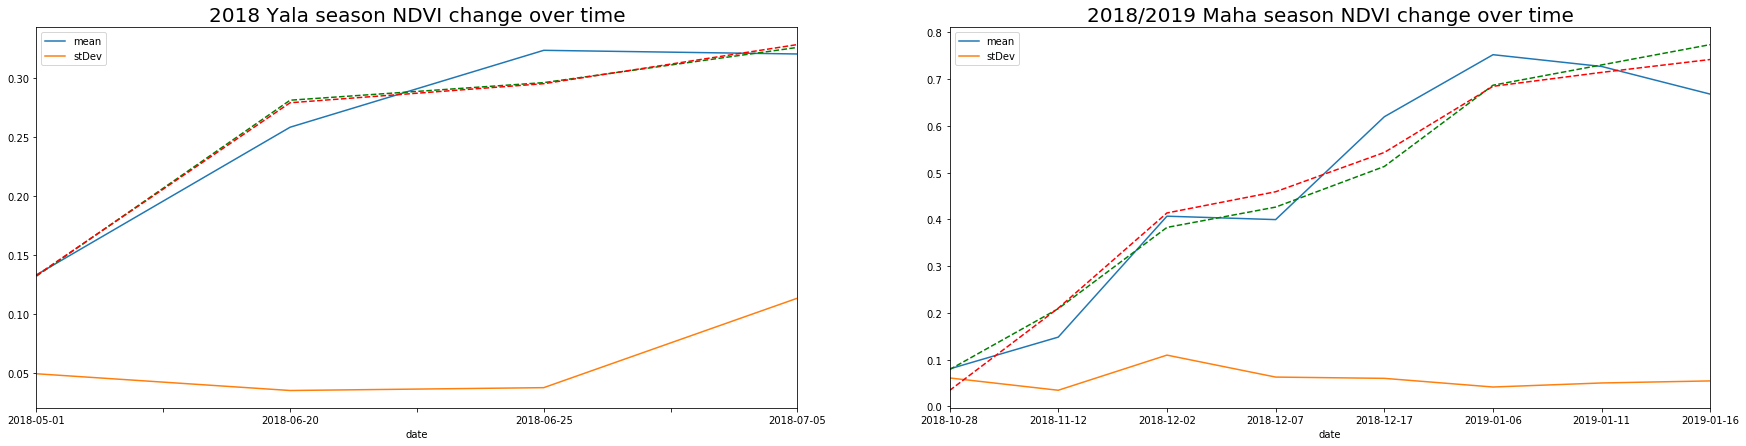

In [155]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-16'], ['2018-10-26', '2019-01-20']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [165]:
print("2018-2019 Maha season 3rd phase(2) "+ str(linear_model.predict([[0.008693122287653895]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.40384096]] pre acre


### ployline mode with order 2

In [166]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-4.444932511925169]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.34790508]] pre acre


### ployline mode with order 1

In [167]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[65.53026977538318]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.3333057]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.0074503514384336505
poly gradient is: -8.193244680155042e-05 120.78258181235718


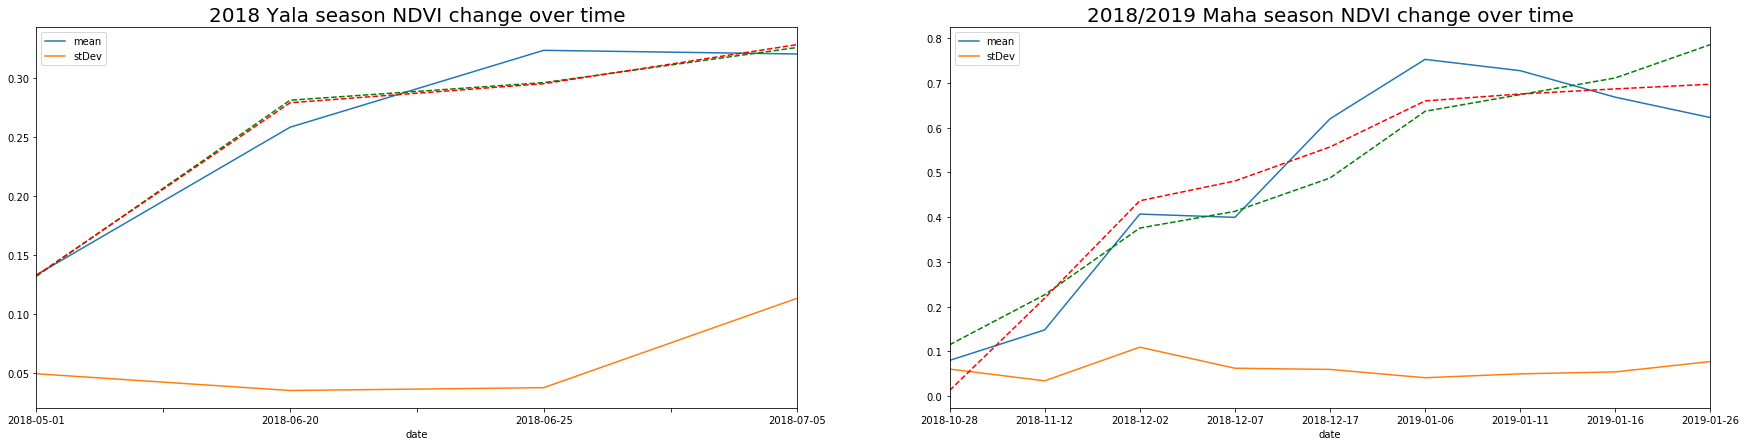

In [162]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-26'], ['2018-10-26', '2019-01-30']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [171]:
print("2018-2019 Maha season 3rd phase(3) "+ str(linear_model.predict([[0.0074503514384336505]]))+ " pre acre")

2018-2019 Maha season 3rd phase(3) [[1.38898109]] pre acre


### ployline mode with order 2

In [172]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-8.193244680155042]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.35347037]] pre acre


### ployline mode with order 1

In [175]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[120.78258181235718]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.3439189]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.005852098067393626
poly gradient is: -9.542165580304885e-05 140.66661226986267


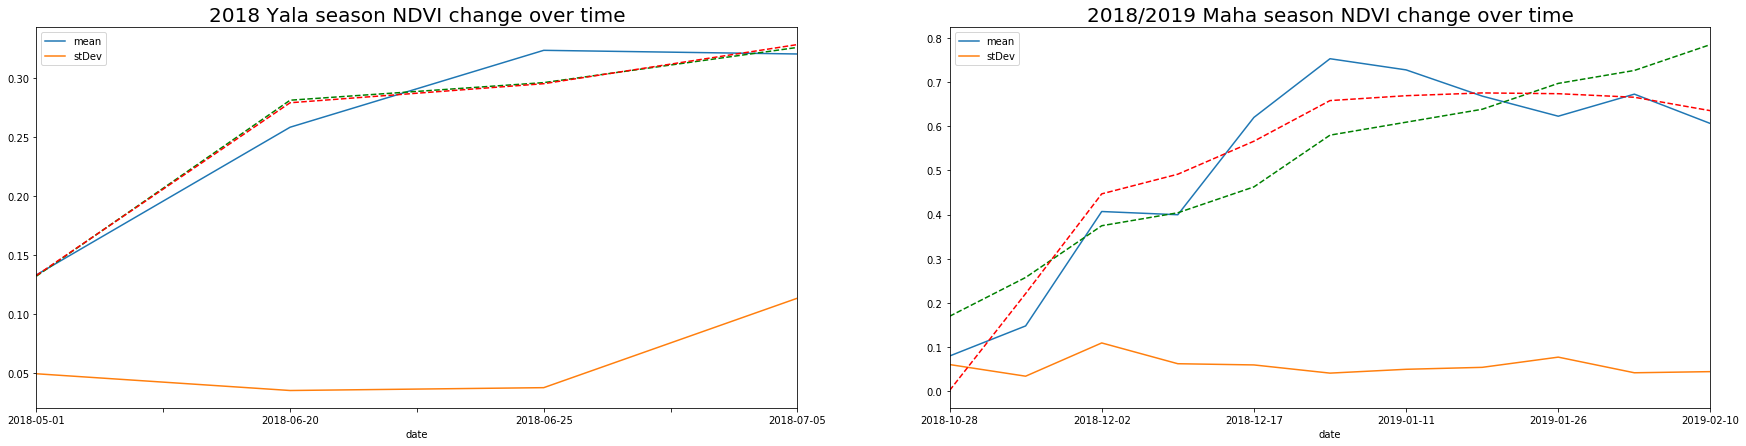

In [170]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-08-10'], ['2018-10-26', '2019-02-10']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [176]:
print("2018-2019 Maha season 3rd phase(3) "+ str(linear_model.predict([[0.005852098067393626]]))+ " pre acre")

2018-2019 Maha season 3rd phase(3) [[1.36987071]] pre acre


### ployline mode with order 2

In [177]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-9.542165580304885]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.35547317]] pre acre


### ployline mode with order 1

In [178]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[140.66661226986267]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.34773834]] pre acre
